In [1]:
import json
import requests
from os import makedirs
from os.path import join, exists
from datetime import date, timedelta
import pandas as pd
import numpy as np
from tqdm import tqdm

# import counter
from collections import Counter

from wordcloud import WordCloud
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
import re

from nltk.corpus import stopwords

In [2]:
MY_API_KEY = '710fe651-165f-40c2-a3cc-af3a08220387'

In [3]:
def get_guardian_content(start_date, end_date):
    api_url = 'https://content.guardianapis.com/search?q=football'
    my_params = {
        'from-date': start_date,
        'to-date': end_date,
        'order-by': "newest",
        'show-fields': 'all',
        'page-size': 200,
        'api-key': MY_API_KEY
    }
    
    all_articles = []  # List to store all articles
    
    page = 1
    while True:
        my_params['page'] = page
        response = requests.get(api_url, params=my_params)
        data = response.json()
        articles = data.get('response', {}).get('results', [])
        
        if not articles:  # No more articles available
            break
        
        all_articles.extend(articles)
        page += 1

        # Update progress bar
        tqdm.write(f"Retrieved {len(all_articles)} articles", end='\r')

        
        
        
    return all_articles




In [4]:
def scrape_yearly_articles(year):
    start_date = f"{year}-01-01"
    end_date = f"{year}-12-31"
    
    all_articles = get_guardian_content(start_date, end_date)
    
    # Save the articles to a JSON file
    save_path = f"data/guardian_data_{year}.json"
    makedirs('data', exist_ok=True)
    with open(save_path, 'w') as f:
        json.dump(all_articles, f)
    
    print(f'Data saved to {save_path}')



In [96]:
scrape_yearly_articles(2023)

Data saved to data/guardian_data_2023.json


In [97]:
scrape_yearly_articles(2022)

Data saved to data/guardian_data_2022.json


In [98]:
scrape_yearly_articles(2021)

Data saved to data/guardian_data_2021.json


In [99]:
scrape_yearly_articles(2020)

Data saved to data/guardian_data_2020.json


In [5]:
scrape_yearly_articles(2019)

Data saved to data/guardian_data_2019.json


In [6]:
scrape_yearly_articles(2018)

Data saved to data/guardian_data_2018.json


In [7]:
scrape_yearly_articles(2017)

Data saved to data/guardian_data_2017.json


In [8]:
start_date = '2024-01-01'
end_date = '2024-08-31'

response = get_guardian_content(start_date, end_date)

# saved the data to a json file
# makedirs('data', exist_ok=True)
with open('data/guardian_data_2024.json', 'w') as f:
    json.dump(response, f)
    
print('Data saved to', 'data/guardian_data_2024.json')

Data saved to data/guardian_data_2024.json


In [9]:
# open all the json files and merge
all_data = []
for year in range(2017, 2025):
    with open(f'data/guardian_data_{year}.json') as f:
        data = json.load(f)
        all_data.extend(data)

# Save the merged data to a JSON file
with open('data/guardian_data_all.json', 'w') as f:
    json.dump(all_data, f)

    

In [10]:
# create dataframe from all_data
df = pd.DataFrame(all_data)
df.head()

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,fields,isHosted,pillarId,pillarName
0,football/2017/dec/31/jurgen-klopp-mohamed-sala...,article,football,Football,2017-12-31T22:30:10Z,Jürgen Klopp says Mohamed Salah is even better...,https://www.theguardian.com/football/2017/dec/...,https://content.guardianapis.com/football/2017...,{'headline': 'Jürgen Klopp says Mohamed Salah ...,False,pillar/sport,Sport
1,football/2017/dec/31/manchester-united-jose-mo...,article,football,Football,2017-12-31T22:30:10Z,‘Unlucky’ Manchester United to regroup after s...,https://www.theguardian.com/football/2017/dec/...,https://content.guardianapis.com/football/2017...,{'headline': '‘Unlucky’ Manchester United to r...,False,pillar/sport,Sport
2,sport/2018/jan/01/adelaides-sarah-perkins-aflw...,article,sport,Sport,2017-12-31T20:00:06Z,Adelaide's Sarah Perkins: ‘AFLW will grow in e...,https://www.theguardian.com/sport/2018/jan/01/...,https://content.guardianapis.com/sport/2018/ja...,{'headline': 'Adelaide's Sarah Perkins: ‘AFLW ...,False,pillar/sport,Sport
3,football/2017/dec/31/arsene-wenger-attacks-ref...,article,football,Football,2017-12-31T19:55:29Z,Arsène Wenger attacks refereeing standards aft...,https://www.theguardian.com/football/2017/dec/...,https://content.guardianapis.com/football/2017...,{'headline': 'Arsène Wenger attacks refereeing...,False,pillar/sport,Sport
4,football/2017/dec/31/manchester-united-ashley-...,article,football,Football,2017-12-31T19:19:00Z,Manchester United’s Ashley Young given three-m...,https://www.theguardian.com/football/2017/dec/...,https://content.guardianapis.com/football/2017...,{'headline': 'Manchester United’s Ashley Young...,False,pillar/sport,Sport


In [11]:
len(df)

57042

In [16]:
# values count of the sectionName
df['sectionName'].value_counts()

# should full list
df['sectionName'].unique()

array(['Football', 'Sport', 'Opinion', 'UK news', 'World news', 'Society',
       'Fashion', 'US news', 'Books', 'Life and style', 'Business',
       'Television & radio', 'Music', 'Technology', 'Environment',
       'Politics', 'Art and design', 'News', 'Australia news', 'Media',
       'Stage', 'Culture', 'Cities', 'Education', 'GNM press office',
       'Games', 'Money', 'Film', 'Science', 'Global', 'Community',
       'Social Care Network', 'Guardian Masterclasses', 'Food', 'Travel',
       'Global development', 'Teacher Network', 'Membership', 'Law',
       'Inequality', 'Voluntary Sector Network', 'Guardian Careers',
       'Global Development Professionals Network', 'Info',
       'Guardian Live Australia', 'Housing Network',
       'Guardian Small Business Network', 'Guardian Sustainable Business',
       'Crosswords', 'Help', 'wellbeing at work', 'From the Guardian',
       'Working in development', 'Public Leaders Network',
       'Healthcare Professionals Network', 'Guardian

In [17]:
# create dataframe df_football with only football articles
df_football = df[df['sectionName'] == 'Football']

In [18]:
df_football.head()

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,fields,isHosted,pillarId,pillarName
0,football/2017/dec/31/jurgen-klopp-mohamed-sala...,article,football,Football,2017-12-31T22:30:10Z,Jürgen Klopp says Mohamed Salah is even better...,https://www.theguardian.com/football/2017/dec/...,https://content.guardianapis.com/football/2017...,{'headline': 'Jürgen Klopp says Mohamed Salah ...,False,pillar/sport,Sport
1,football/2017/dec/31/manchester-united-jose-mo...,article,football,Football,2017-12-31T22:30:10Z,‘Unlucky’ Manchester United to regroup after s...,https://www.theguardian.com/football/2017/dec/...,https://content.guardianapis.com/football/2017...,{'headline': '‘Unlucky’ Manchester United to r...,False,pillar/sport,Sport
3,football/2017/dec/31/arsene-wenger-attacks-ref...,article,football,Football,2017-12-31T19:55:29Z,Arsène Wenger attacks refereeing standards aft...,https://www.theguardian.com/football/2017/dec/...,https://content.guardianapis.com/football/2017...,{'headline': 'Arsène Wenger attacks refereeing...,False,pillar/sport,Sport
4,football/2017/dec/31/manchester-united-ashley-...,article,football,Football,2017-12-31T19:19:00Z,Manchester United’s Ashley Young given three-m...,https://www.theguardian.com/football/2017/dec/...,https://content.guardianapis.com/football/2017...,{'headline': 'Manchester United’s Ashley Young...,False,pillar/sport,Sport
5,football/live/2017/dec/31/west-brom-v-arsenal-...,liveblog,football,Football,2017-12-31T18:27:28Z,West Brom 1-1 Arsenal: Premier League – as it ...,https://www.theguardian.com/football/live/2017...,https://content.guardianapis.com/football/live...,{'headline': 'West Brom 1-1 Arsenal: Premier L...,False,pillar/sport,Sport


In [19]:
# value count of the type of the article
df_football['type'].value_counts()

type
article        25620
liveblog        4245
interactive      308
audio              8
Name: count, dtype: int64

In [27]:
# reinde the dataframe
df_football = df_football.reset_index(drop=True)

In [34]:
# display example where type is interactive
df_football[df_football['type'] == 'audio']


,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,fields,isHosted,pillarId,pillarName
25572,football/audio/2023/jul/04/the-life-and-times-...,audio,football,Football,2023-07-04T04:00:51Z,The life and times of Nicky Bandini – Football...,https://www.theguardian.com/football/audio/202...,https://content.guardianapis.com/football/audi...,{'headline': 'The life and times of Nicky Band...,False,pillar/sport,Sport
26910,football/audio/2023/feb/20/arsenal-on-top-drum...,audio,football,Football,2023-02-20T12:38:17Z,"Arsenal on top, drum’n’bass Q&As and Rashford ...",https://www.theguardian.com/football/audio/202...,https://content.guardianapis.com/football/audi...,"{'headline': 'Arsenal on top, drum’n’bass Q&As...",False,pillar/sport,Sport
27213,football/audio/2023/jan/19/crystal-palace-deny...,audio,football,Football,2023-01-19T13:35:15Z,Palace halt Manchester United charge. Plus the...,https://www.theguardian.com/football/audio/202...,https://content.guardianapis.com/football/audi...,{'headline': 'Palace halt Manchester United ch...,False,pillar/sport,Sport
27231,football/audio/2023/jan/18/sam-kerr-does-sam-k...,audio,football,Football,2023-01-18T10:53:46Z,Sam Kerr does Sam Kerr things on WSL’s big ret...,https://www.theguardian.com/football/audio/202...,https://content.guardianapis.com/football/audi...,{'headline': 'Sam Kerr does Sam Kerr things on...,False,pillar/sport,Sport
27238,football/audio/2023/jan/17/sam-kerr-does-sam-k...,audio,football,Football,2023-01-17T15:09:00Z,Sam Kerr does Sam Kerr things on WSL’s big ret...,https://www.theguardian.com/football/audio/202...,https://content.guardianapis.com/football/audi...,{'headline': 'Sam Kerr does Sam Kerr things on...,False,pillar/sport,Sport
27239,football/audio/2023/jan/17/napoli-surge-in-ser...,audio,football,Football,2023-01-17T11:49:19Z,Napoli surge on in Serie A while PSG remain pa...,https://www.theguardian.com/football/audio/202...,https://content.guardianapis.com/football/audi...,{'headline': 'Napoli surge on in Serie A while...,False,pillar/sport,Sport
27249,football/audio/2023/jan/16/north-london-manche...,audio,football,Football,2023-01-16T14:19:48Z,North London and Manchester turn red on derby-...,https://www.theguardian.com/football/audio/202...,https://content.guardianapis.com/football/audi...,{'headline': 'North London and Manchester turn...,False,pillar/sport,Sport
27317,football/audio/2023/jan/09/stevenage-and-wrexh...,audio,football,Football,2023-01-09T12:39:26Z,Stevenage and Wrexham star amid the FA Cup sho...,https://www.theguardian.com/football/audio/202...,https://content.guardianapis.com/football/audi...,{'headline': 'Stevenage and Wrexham star amid ...,False,pillar/sport,Sport


In [37]:
# display index 51 of the dataframe  
df_football.loc[100]['fields']

{'headline': 'Golden Goals: when George Camsell scored five on Christmas Day 1926',
 'standfirst': '<p>The Middlesbrough striker had a golden season in 1926-27, including a festive scoring streak that made life particularly hectic for football statisticians</p>',
 'trailText': 'The Middlesbrough striker had a golden season in 1926-27, including a festive scoring streak that made life particularly hectic for football statisticians',
 'byline': 'Simon Burnton',
 'main': '<figure class="element element-image" data-media-id="2e25d1e6db36b1a83368ac3f93ae01426f5a54f1"> <img src="https://media.guim.co.uk/2e25d1e6db36b1a83368ac3f93ae01426f5a54f1/973_654_2631_1579/1000.jpg" alt="George Camsell, here in action for Middlesbrough against Aston Villa." width="1000" height="600" class="gu-image" /> <figcaption> <span class="element-image__caption">George Camsell, here in action for Middlesbrough against Aston Villa.</span> <span class="element-image__credit">Photograph: Colorsport/Rex/Shutterstock</

In [39]:
# add new column with date of publication
df_football['date'] = df_football['webPublicationDate'].str[:10]

In [40]:
# create summary of number of articles per day
articles_per_day = df_football['date'].value_counts().sort_index()

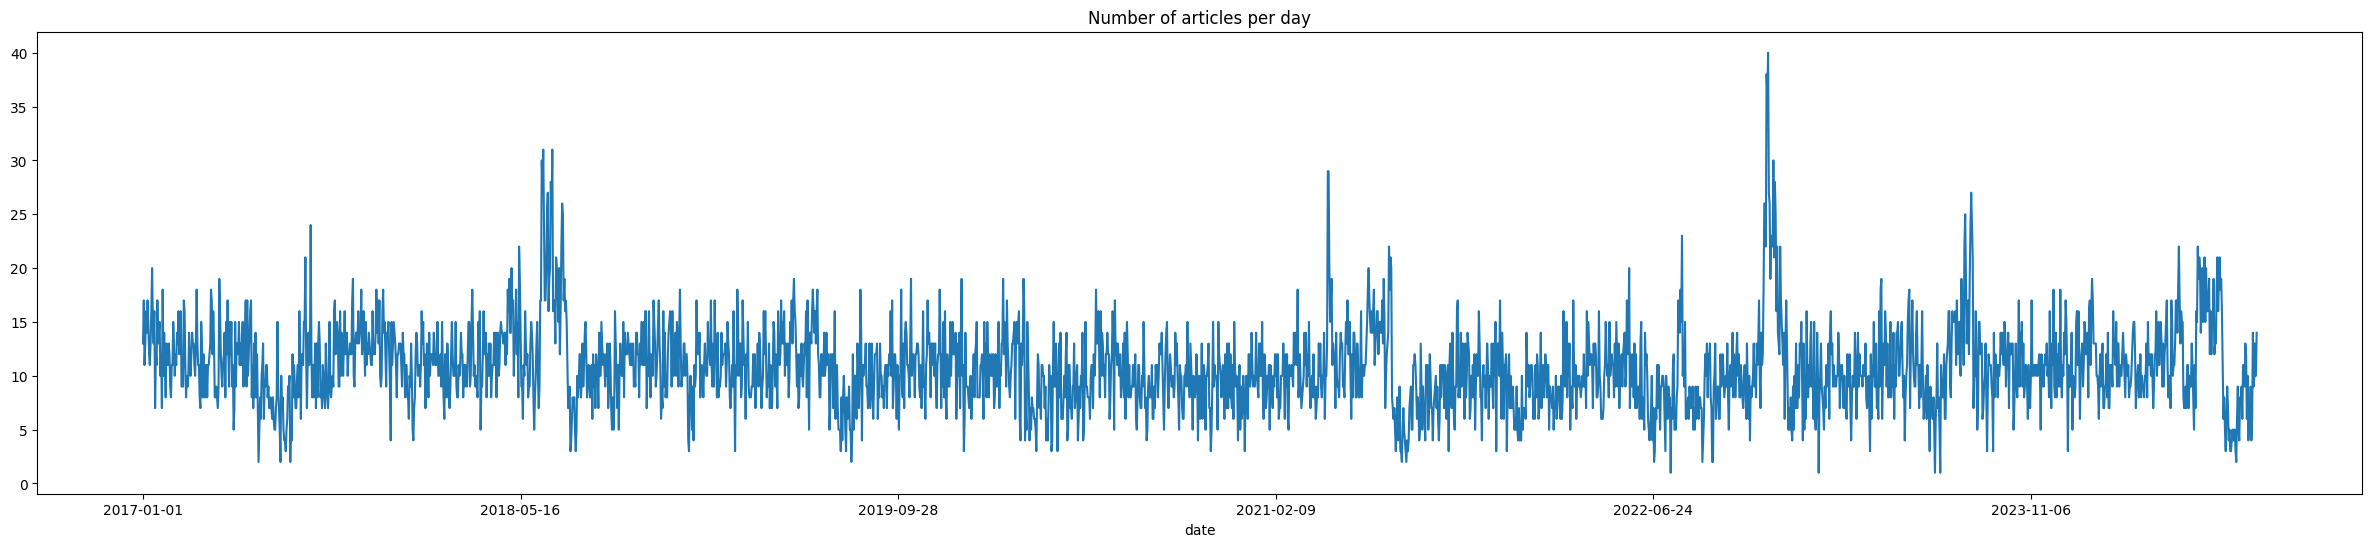

In [43]:
# plot number of articles per day
articles_per_day.plot(kind='line', figsize=(30, 6), title='Number of articles per day')
plt.show()

In [1]:
# split the fields column into multiple columns
df_football = pd.concat([df_football, df_football['fields'].apply(pd.Series)], axis=1)

NameError: name 'pd' is not defined